In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler# scales features to zero mean and unit variance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv("train.csv")
df_encoded = df.copy()

In [10]:
print("Dataset shape:", df.shape)

Dataset shape: (891, 12)


In [11]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
print("\nTarget distribution:")
print(df["Survived"].value_counts())
print("\nTarget distribution (normalized):")
print(df["Survived"].value_counts(normalize=True))


Target distribution:
Survived
0    549
1    342
Name: count, dtype: int64

Target distribution (normalized):
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [13]:
plt.figure()
df["Survived"].value_counts().plot(kind="bar")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Distribution")
plt.show()

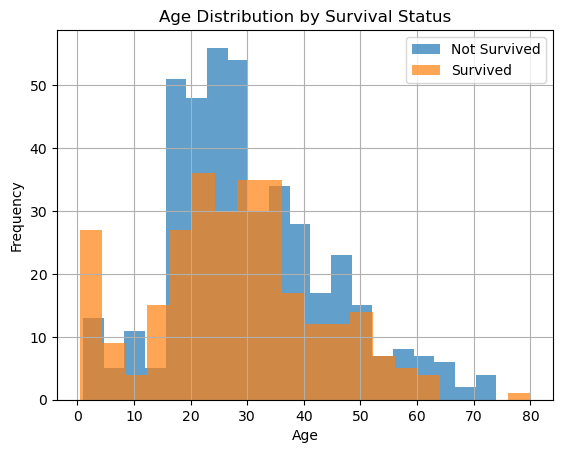

In [14]:
plt.figure()
df[df["Survived"] == 0]["Age"].hist(bins=20, alpha=0.7)
df[df["Survived"] == 1]["Age"].hist(bins=20, alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Survival Status")
plt.legend(["Not Survived", "Survived"])
plt.show()

In [15]:
df_encoded["Sex"] = df_encoded["Sex"].map({"male": 0, "female": 1})
df_encoded["Embarked"] = df_encoded["Embarked"].map({"S": 0, "C": 1, "Q": 2})
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"

In [16]:
data = df_encoded[features]
labels = df_encoded[target]

In [17]:
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])
data["Fare"] = data["Fare"].fillna(data["Fare"].median())

C:\Users\Parayan\AppData\Local\Temp\ipykernel_27592\4181445439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = data["Age"].fillna(data["Age"].median())
C:\Users\Parayan\AppData\Local\Temp\ipykernel_27592\4181445439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])
C:\Users\Parayan\AppData\Local\Temp\ipykernel_27592\4181445439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(X_valid_scaled)
acc = accuracy_score(y_valid, y_pred)
print(f"KNN validation accuracy: {acc:.4f}")

KNN validation accuracy: 0.8101
